In [339]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, cohen_kappa_score
from sklearn.impute import SimpleImputer


In [340]:
df = pd.read_csv('../data/clear_perfil_visitor_and_students.csv')

C:\Users\anafl\AppData\Local\Temp\ipykernel_37764\3720532532.py:1: DtypeWarning: Columns (19,20,21,22,24,25,26,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/clear_perfil_visitor_and_students.csv')


In [399]:
# Convert 'data_da_primeira_conversão' to datetime if it's not already
df['data_da_primeira_conversão'] = pd.to_datetime(df['data_da_primeira_conversão'])

# Create a boolean mask based on the conditions
mask = (
    (df['como_você_conheceu_a_sustentare:'] == 'Mala Direta') &
    (df['data_da_primeira_conversão'].notnull()) &
    (df['data_da_primeira_conversão'].dt.year == 2023)
)

# Apply the mask to get the filtered rows
filtered_rows = df[mask]

# Display the result
filtered_rows

,email,nome,lead_scoring_-_perfil,url_pública,estágio_no_funil,total_de_conversões,lead_scoring_-_interesse,status_para_comunicação_por_email,data_da_primeira_conversão,eventos_(últimos_100),...,whatsapp,webinar,gratuito,festival,linkedin,ebook,exame-de-bolsas,bolsa-de-estudos,total_interacoes,total_eventos


# Efective Actions

In [341]:
df.columns

Index(['email', 'nome', 'lead_scoring_-_perfil', 'url_pública',
       'estágio_no_funil', 'total_de_conversões', 'lead_scoring_-_interesse',
       'status_para_comunicação_por_email', 'data_da_primeira_conversão',
       'eventos_(últimos_100)', 'origem_da_última_conversão',
       'data_da_última_conversão', 'origem_da_primeira_conversão', 'empresa',
       'tags', 'data_da_última_oportunidade', 'estado',
       'valor_total_da_oportunidade_no_crm_(última_atualização)',
       'qualificação_da_oportunidade_no_crm_(última_atualização)',
       'etapa_do_funil_de_vendas_no_crm_(última_atualização)',
       'nome_do_responsável_pela_oportunidade_no_crm_(última_atualização)',
       'origem_da_oportunidade_no_crm_(última_atualização)',
       'possui_interesse_em_realizar_uma_pós-graduação_ou_mba?',
       'desejo_receber_o_sustentare_news', 'como_você_conheceu_a_sustentare:',
       'universidade', 'qual_o_curso_de_interesse?', 'cargo_final',
       'area_atuacao', 'interesse_final', '

In [381]:
events = df[['aluno','total_de_conversões','desejo_receber_o_sustentare_news' ,'origem_da_última_conversão', 'origem_da_primeira_conversão','valor_total_da_oportunidade_no_crm_(última_atualização)', 
             'qualificação_da_oportunidade_no_crm_(última_atualização)', 'origem_da_oportunidade_no_crm_(última_atualização)',
             'como_você_conheceu_a_sustentare:', 'interesse_final', 'total_eventos']]

events = df[['total_de_conversões', 'valor_total_da_oportunidade_no_crm_(última_atualização)',
             'qualificação_da_oportunidade_no_crm_(última_atualização)','origem_da_última_conversão',
            'origem_da_primeira_conversão', 'origem_da_oportunidade_no_crm_(última_atualização)','aluno',
            'total_eventos', 'como_você_conheceu_a_sustentare:']]

In [383]:
events = df[['aluno','origem_da_última_conversão', 'origem_da_primeira_conversão', 'origem_da_última_conversão',
              'origem_da_oportunidade_no_crm_(última_atualização)',
             'como_você_conheceu_a_sustentare:', 'total_eventos']]

In [421]:
events = df[['aluno','origem_da_última_conversão', 'origem_da_primeira_conversão', 
             'origem_da_oportunidade_no_crm_(última_atualização)',
             'como_você_conheceu_a_sustentare:', 'total_eventos']]

In [422]:
def convert_object_to_categorical(df):
    """
    Convert columns with object dtype to categorical in a DataFrame.

    Parameters:
    - DataFrame

    Returns:
    - DataFrame with updated data types
    """
    for col in df.columns:
        if df[col].dtype == 'O':  # Check if dtype is object
            df[col] = df[col].astype('category')

    return df

events = convert_object_to_categorical(events)
events.dtypes

C:\Users\anafl\AppData\Local\Temp\ipykernel_37764\1172854959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category')
C:\Users\anafl\AppData\Local\Temp\ipykernel_37764\1172854959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category')
C:\Users\anafl\AppData\Local\Temp\ipykernel_37764\1172854959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

aluno                                                    int64
origem_da_última_conversão                            category
origem_da_primeira_conversão                          category
origem_da_oportunidade_no_crm_(última_atualização)    category
como_você_conheceu_a_sustentare:                      category
total_eventos                                            int64
dtype: object

In [423]:
# 'aluno' is  target column
X = events.drop(['aluno'], axis=1)
y = events['aluno']


# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', seed=42, enable_categorical=True)

# Train the classifier
xgb_clf.fit(X_train, y_train)

# Predictions
y_pred = xgb_clf.predict(X_test)

In [424]:
y_test.value_counts(normalize=True)

aluno
0    0.982395
1    0.017605
Name: proportion, dtype: float64

In [425]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(cohen_kappa_score(y_test, y_pred))

Accuracy: 0.9806788511749347
0.06661936893280884


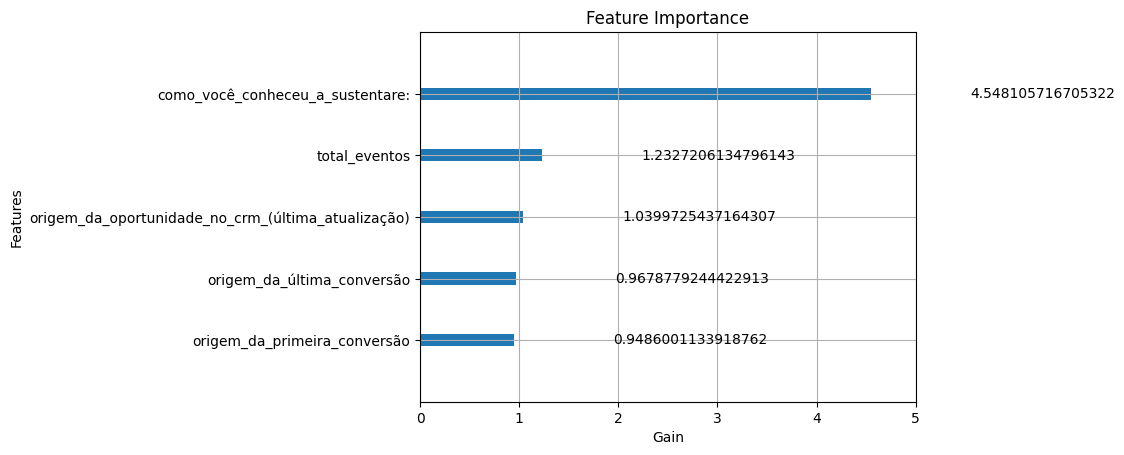

In [426]:
xgb.plot_importance(xgb_clf, importance_type='gain', show_values=True, title='Feature Importance', xlabel='Gain')
plt.show()

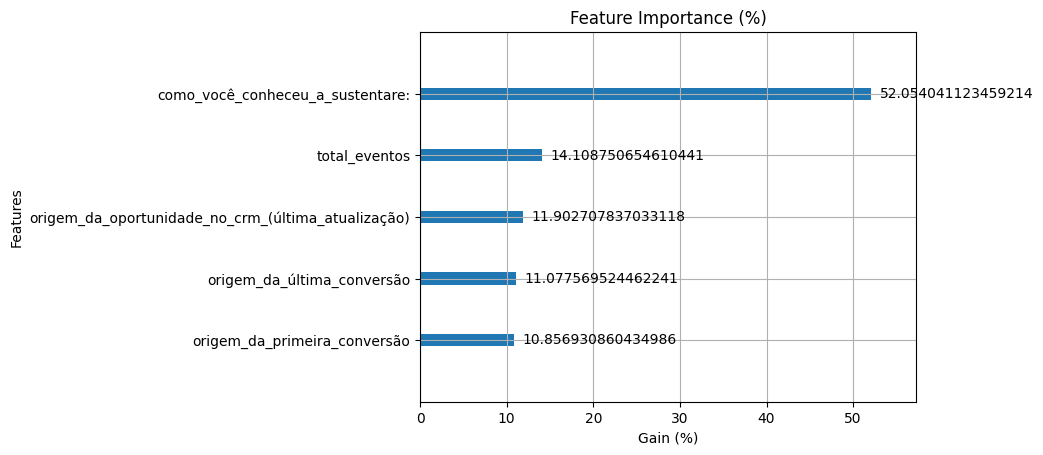

In [427]:
# Get feature importance using gain
importance = xgb_clf.get_booster().get_score(importance_type='gain')

# Calculate the total gain
total_gain = sum(importance.values())

# Convert gains to percentage
importance_percentage = {feature: (gain / total_gain) * 100 for feature, gain in importance.items()}

# Plot the importance in percentage
xgb.plot_importance(importance_percentage, show_values=True, title='Feature Importance (%)', xlabel='Gain (%)')
plt.show()


# Profile 

In [308]:
perfil = df[['empresa', 'estado', 'universidade', 'qual_o_curso_de_interesse?', 'aluno', 'cidade', 'age' ]]

In [309]:
def convert_object_to_categorical(df):
    """
    Convert columns with object dtype to categorical in a DataFrame.

    Parameters:
    - DataFrame

    Returns:
    - DataFrame with updated data types
    """
    for col in df.columns:
        if df[col].dtype == 'O':  # Check if dtype is object
            df[col] = df[col].astype('category')

    return df

perfil = convert_object_to_categorical(perfil)
perfil.dtypes


C:\Users\anafl\AppData\Local\Temp\ipykernel_37764\3910576977.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category')
C:\Users\anafl\AppData\Local\Temp\ipykernel_37764\3910576977.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category')
C:\Users\anafl\AppData\Local\Temp\ipykernel_37764\3910576977.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

empresa                       category
estado                        category
universidade                  category
qual_o_curso_de_interesse?    category
aluno                            int64
cidade                        category
age                            float64
dtype: object

In [310]:

# 'aluno' is  target column
X = perfil.drop(['aluno'], axis=1)
y = perfil['aluno']


# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', seed=42, enable_categorical=True)

# Train the classifier
xgb_clf.fit(X_train, y_train)

# Predictions
y_pred = xgb_clf.predict(X_test)



In [311]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(cohen_kappa_score(y_test, y_pred))

Accuracy: 0.9997389033942559
0.992459709649603


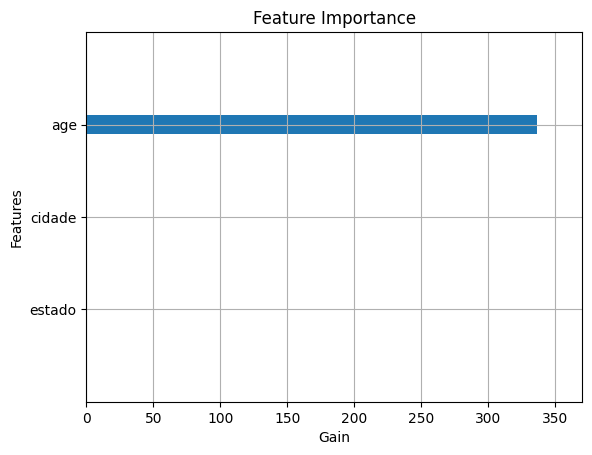

In [312]:
xgb.plot_importance(xgb_clf, importance_type='gain', show_values=False, title='Feature Importance', xlabel='Gain')
plt.show()